# <font size="7">Model Fitness</font> <br><font size="6">Forecasts and predictions project</font>

## Project introduction:
The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.
In order to fight churn, Model Fitness has digitized a number of its customer profiles. 

## Project goal:
Analyze Model Fitness' customer profiles and come up with a customer retention strategy.

<a id="table"></a>

---

# <font size="4"> Table of Contents </font>
- [Importing libraries and data](#import)
- [fields (columns) explanation](#fields)


- [EDA: A look at the dataset](#alookat)
    - [Sample<br>Shape<br>Info](#sample)
    - [Missing values<br> Duplicates](#nulls)
    - [Dataset conclusions](#firstcheck)
    - [Fxing dtype for Month_to_end_contract](#dtype)
    - [Describe<br>Describe conclusions](#describe)
    - [Churned \ Retained feature means](#churnmeans)
    - [Churned \ Retained histograms](#histograms)
    - [Explaining the feature churn means](#churnmeansmeans)
    - [Correlation matrix heatmap<br>Correlations heatmap conclusions](#corrmap)
    - [Conclusions for looking at the dataset](#look_conc)


- [Churn prediction and clustering](#buildmodel)
    - [Model creation<br>Model standarizing & training](#bereshit)
    - [Training:<br>Logistic Regression<br>And Random Forest](#models_train_at_gym)
    - [Score evaluation & comparison<br>Score evaluation conclusions](#scores)
    - [Clustering](#clustering)
    - [Cluster feature means](#meanclusters)
    - [Cluster feature distribution](#Clusterdist)
    - [Cluster churn rate](#clusterchurn)
    - [Clusters conclusions](#clusterconc)
    
    ---

[Jump to General conclusions and recommendations](#general_electric)

---
<a id="import"></a>

# Importing libraries and reading the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

#sklearn:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans

In [2]:
#Reading files:
gym = pd.read_csv('gym_churn_us.csv')

[Back to table of contents](#table) <a id="fields"></a>

---

### Explaining the dataset fields:
- **`Churn`** — the fact of churn for the month in question
- Current dataset fields:
    - User data for the preceding month
        - **`gender`**
        - **`Near_Location`** — whether the user lives or works in the neighborhood where the gym is located
        - **`Partner`** — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)
        - **Promo_friends** — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)
        - **`Phone`** — whether the user provided their phone number
        - **`Age`**
        - **`Lifetime`** — the time (in months) since the customer first came to the gym

- Data from the log of visits and purchases and data on current membership status
    - **`Contract_period`** — 1 month, 3 months, 6 months, or 1 year
    - **`Month_to_end_contract`** — the months remaining until the contract expires
    - **`Group_visits`** — whether the user takes part in group sessions
    - **`Avg_class_frequency_total`** — average frequency of visits per week over the customer's lifetime
    - **`Avg_class_frequency_current_month`** — average frequency of visits per week over the preceding month
    - **`Avg_additional_charges_total`** — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.

[Back to table of contents](#table) <a id="alookat"></a>

---

# EDA - <br>Looking at the data

<font size="4">**EDA - Table of Contents** </font>

[Back to main table of contents](#table)
- [Sample<br>Shape<br>Info](#sample)
- [Missing values<br> Duplicates](#nulls)
- [Dataset conclusions](#firstcheck)
- [Fxing dtype for Month_to_end_contract](#dtype)
- [Describe<br>Describe conclusions](#describe)
- [Churned \ Retained feature means](#churnmeans)
- [Churned \ Retained histograms](#histograms)
- [Explaining the feature churn means](#churnmeansmeans)
- [Correlation matrix heatmap<br>Correlations heatmap conclusions](#corrmap)
- [Conclusions for looking at the dataset](#look_conc)
    
---
<a id="sample"></a>

### Sample, Shape, and Info

In [3]:
gym.sample(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
1203,0,1,1,0,1,12,0,37,157.501037,12.0,3,3.682757,3.618407,0
1791,1,0,0,0,1,1,0,34,224.208611,1.0,2,3.317759,3.386540,0
534,1,1,1,1,1,6,0,27,4.441154,6.0,3,2.282574,2.229358,0
923,0,1,0,0,1,1,0,32,173.789725,1.0,5,2.737859,2.997835,0
1629,0,1,0,0,1,1,0,28,310.407612,1.0,4,4.443218,4.471150,0


In [4]:
#how big is it?
gym.shape

(4000, 14)

In [5]:
#some info about the data:
gym.info(memory_usage  = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

- [Back to table of contents](#table) <a id="nulls"></a>
- [Back to EDA](#alookat)

### Checking Missing values and duplicates

In [6]:
#sum of sum of null values:
gym.isnull().sum().sum()

0

In [7]:
#sum of duplicated data:
gym.duplicated().sum()

0

- [Back to table of contents](#table) <a id="firstcheck"></a>
- [Back to EDA](#alookat)

---
### Having checked the above we can already see
- There are no missing values, and no duplicates.
- Dtypes are set to int and float as they should be, except for Month_to_end_contract, that could be an int as well.
- The size of our data is 4000 rows, 13 features and one target field.

- [Back to table of contents](#table) <a id="dtype"></a>
- [Back to EDA](#alookat)

---

### Fxing dtype for Month_to_end_contract

In [8]:
gym['Month_to_end_contract'] = gym['Month_to_end_contract'].astype('int')
print('dtype: ',gym['Month_to_end_contract'].dtype)
print('unique values:', sorted(gym['Month_to_end_contract'].unique()))

dtype:  int32
unique values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


- [Back to table of contents](#table) <a id="describe"></a>
- [Back to EDA](#alookat)

---

### Describe() for more info

In [9]:
#describe data:  (splitting so it all fits nicely on screen)
display(gym[gym.columns[:8]].describe())
display(gym[gym.columns[8:]].describe())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000


,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


### Describe shows us that
- Half of the features are binary, the rest are categorical or numerical.
- In the binary features we can tell that:
    - **Gender, Partner** And **Group_visits**, are spread evenly between 1 and 0 values.
    - For **Near_Location, and Phone**, the majority of values are at 1.
    - **Churn**, and **Promo_friends** have more values at 0.
- For the rest of the columns:
    - Values for **Contact_Period's** **Month_to_end_contract**, are lower than the mean of 4.68 \ 4.32 (range of 1 - 12). this means the majority of the costumers have one month left in the subscription.
    - **Age, Avg_additional_charges_total, Lifetime, Avg_class_frequency_total, and Avg_class_frequency_current_month**, have values that are spread evenly.
- **Standard deviation** is moderately small in in most fields, this means the data is somewhat clustered around the mean.<br>
    except for **Age**, in which the standard deviation is exceptionally small (3, with mean of 29). This means the data is tightly clustered around the mean.

- [Back to table of contents](#table) <a id="churnmeans"></a>
- [Back to EDA](#alookat)

---

### Features split by Churn status

In [10]:
gym.groupby('Churn').mean().T.rename(columns = {0:'retained', 1:'churned'})

Churn,retained,churned
gender,0.510037,0.510839
Near_Location,0.873086,0.768143
Partner,0.534195,0.355325
Promo_friends,0.353522,0.183789
Phone,0.903709,0.902922
Contract_period,5.747193,1.728558
Group_visits,0.464103,0.268615
Age,29.976523,26.989632
Avg_additional_charges_total,158.445715,115.082899
Month_to_end_contract,5.283089,1.662582


- [Back to table of contents](#table) <a id="histograms"></a>
- [Back to EDA](#alookat)

---

### Feature histograms

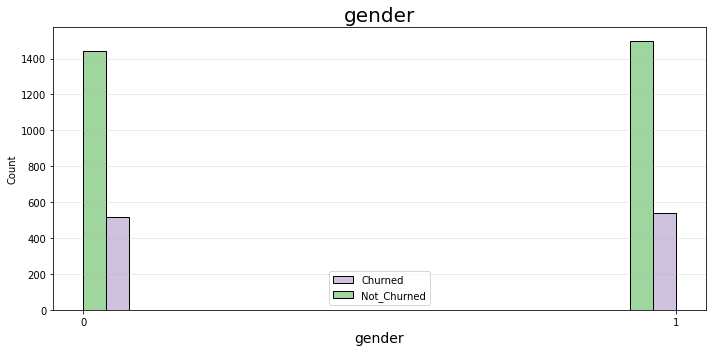

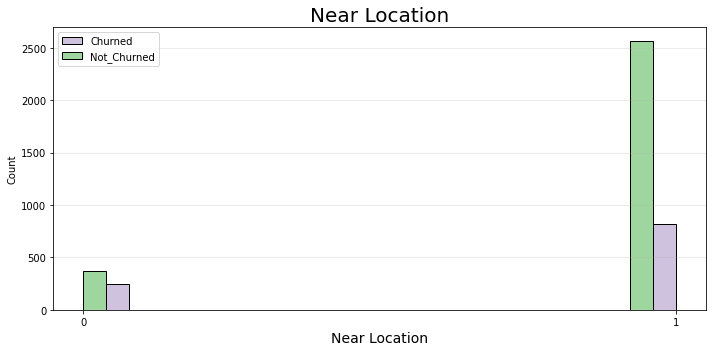

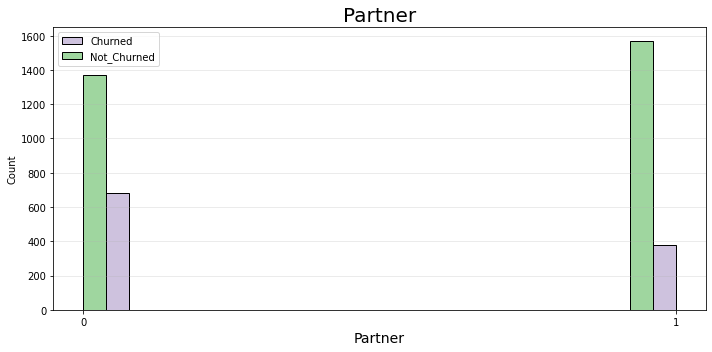

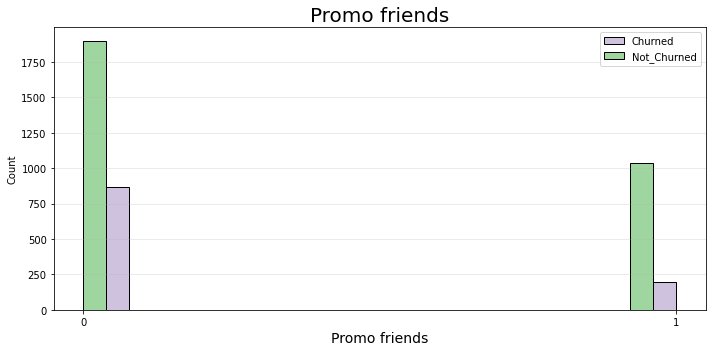

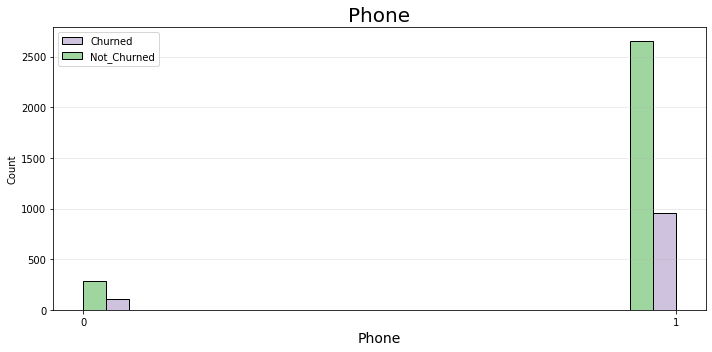

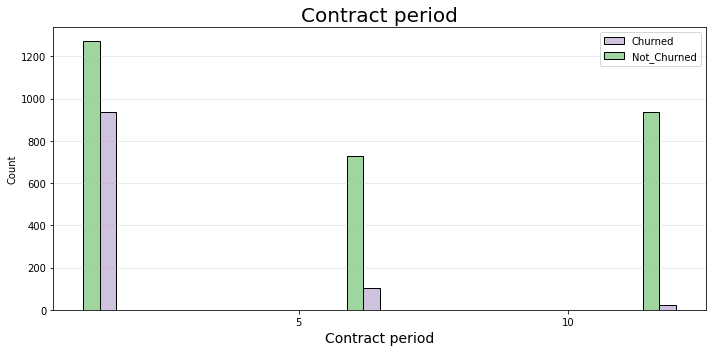

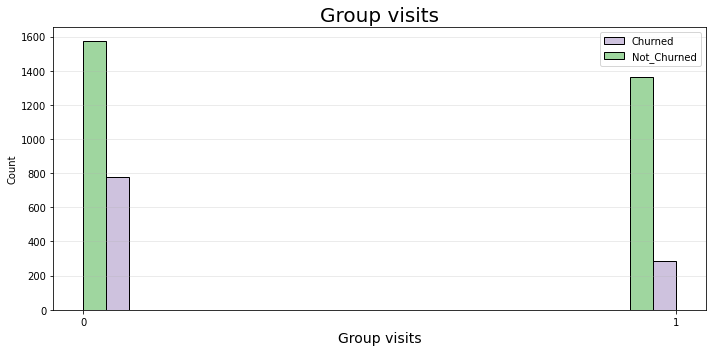

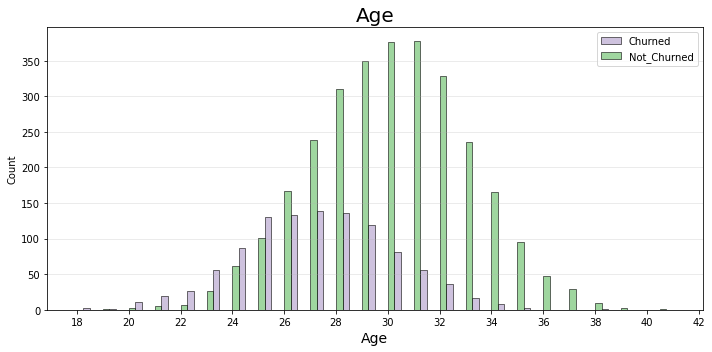

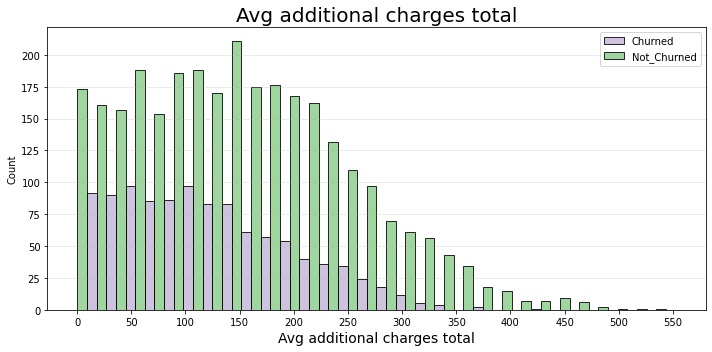

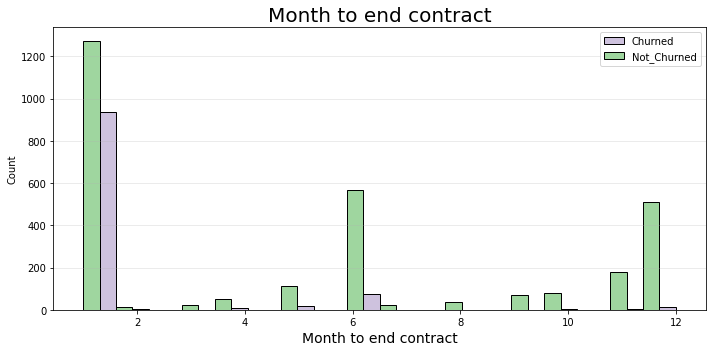

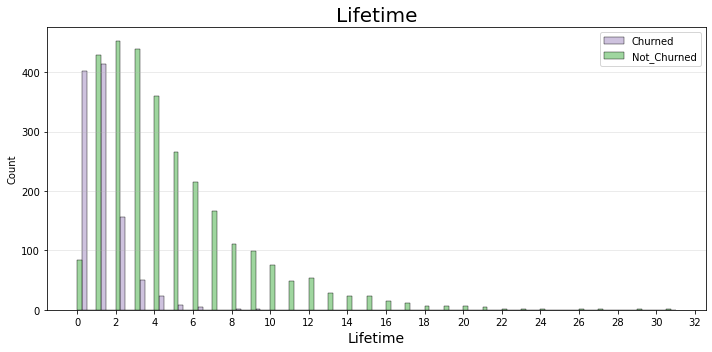

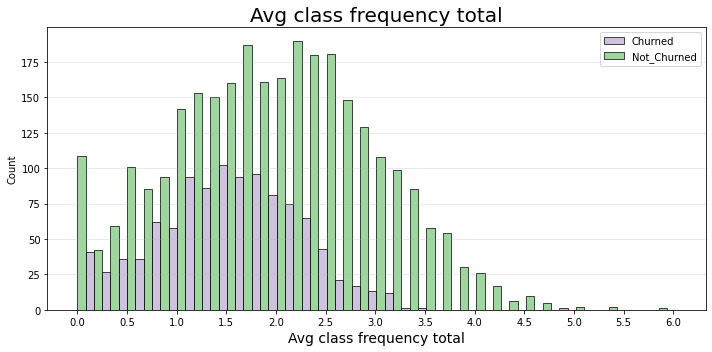

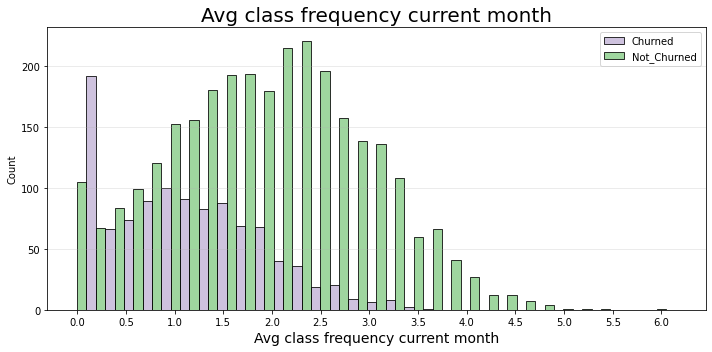

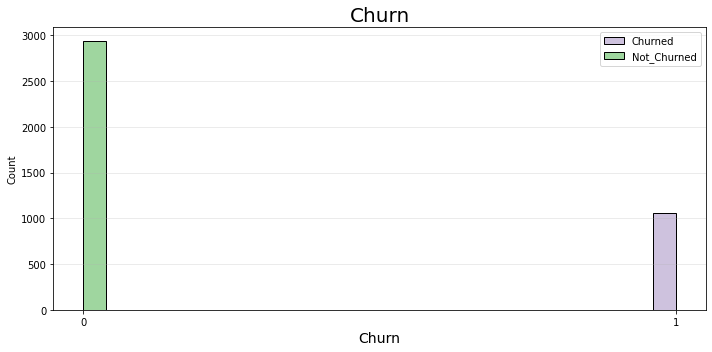

In [11]:
#histograms for the features bades on churn or not churned features
#gym.hist(figsize=(15,15));
for feat in gym.columns:
    values = gym[feat].nunique()
    plt.figure(figsize=(10, 5))
    sns.histplot(gym, x= feat, hue = 'Churn', multiple="dodge", palette = "Accent")
    plt.title(feat.replace('_', ' '), size=20)
    plt.grid(axis = 'y', alpha = 0.3)
    plt.xlabel(feat.replace('_', ' '), size=14)
    plt.locator_params(axis='x', nbins= (gym[feat].nunique() if gym[feat].nunique() <= 30 else 20))
    plt.legend(labels=['Churned', 'Not_Churned'])
    plt.tight_layout()
    plt.show()

- [Back to table of contents](#table) <a id="churnmeansmeans"></a>
- [Back to EDA](#alookat)

### having checked the features histogram and churn status we can tell:
- These features seem to have little or no effect on whether users will churn or not:<br>
    **Gender, Near_Location**, and **Phone**.
- While **Age** seems to affect churn only a little, we can see that younger ages churn more than the older ages, 27 is the most frequent age to churn, while 31 is the most frequent age to stay.
- These features seem to matter and users are likely to churn if their values are low:<br>
    **Partner, Promo_friends, Group_visits, Avg_additional_charges_total, Avg_class_frequency_total**, and **Avg_class_frequency_current_month**.
- **Contact period** and **Lifetime** are especially important, those who have long contracts (6 months and above), and those who already have gone through a few months of subscription are more likely to stay.

---

<a id="q1"></a>

- [Back to table of contents](#table) <a id="corrmap"></a>
- [Back to EDA](#alookat)

---

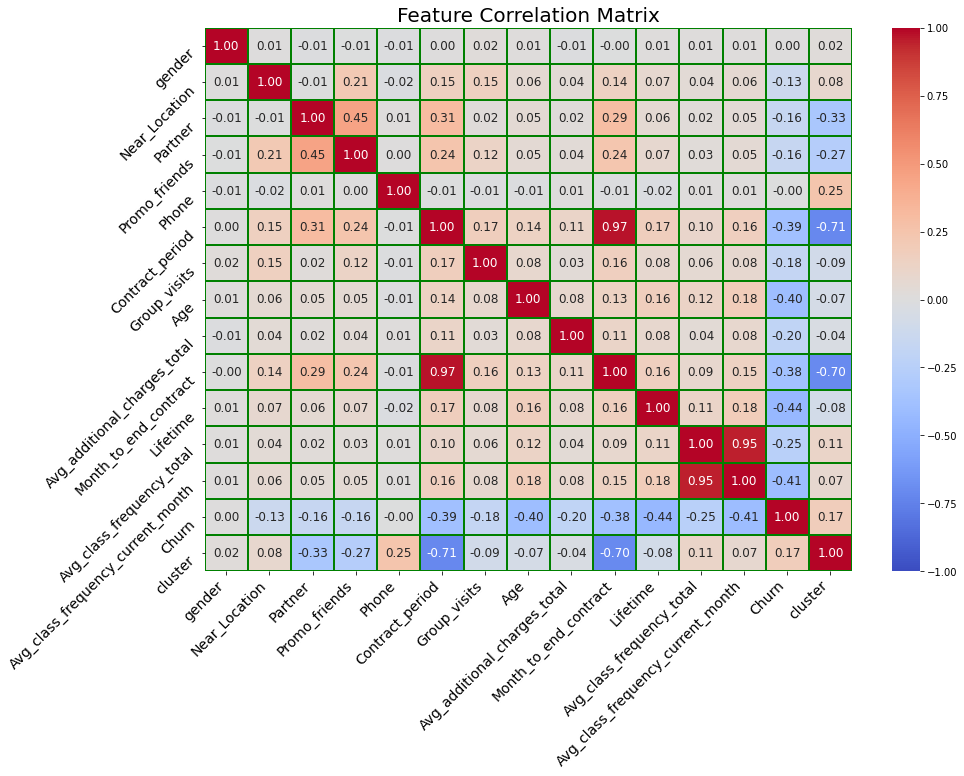

In [26]:
#making a heatmap for the correlation matrix:
plt.figure(figsize=(14.5, 10))
heat = sns.heatmap(gym.corr(), annot = True, fmt = '.2f', linewidths= 1.5, linecolor='g', cmap = ('coolwarm'), vmin = -1, vmax = 1, annot_kws={'size':12}) 
plt.title('Feature Correlation Matrix', size = 20)
heat.set_xticklabels(heat.get_xticklabels(), rotation = 45, ha='right', size = 14)
heat.set_yticklabels(heat.get_yticklabels(), rotation = 45, va="top", size = 14)
plt.show()

### By looking at the correlation matrix map we can tell:
- Features that are closely related:<br>
    - **Contract_period** and **Month_to_end_contract**.
    - **Avg_class_frequency_total** and **Avg_class_frequency_current_month**.
    - **Partner** and **Promo_friends**.
- Features that are loosely related:
    - **Partner** and **Contract_period** and **Month_to_end_contract** (probably because contract period and month to end are VERY related).
- Interestly, **Churn** shares a negative correlation with most features by the following order:<br>
    **Lifetime (0.44), Avg_class_frequency_current_month (0.41), Age (0.40), Contract_period (0.39) and Month_to_end_contract (0.38)**.
- **Churn** also has little to no direct correlation to many of the feature columns.
- **Gender**, and **Phone** don't seem to correlate to any of the columns at all.

- [Back to table of contents](#table) <a id="look_conc"></a>
- [Back to EDA](#alookat)
---

## EDA Conclusions
- The data came ready for analysis. No missing values, duplicates, and dtypes are all good (except one column that was fixed). No preprocessing is needed.
- Most costumers have no churned!
- Most costumers have a month left in their contract, many of them also signed up for a monnth long plan,<br>
    costumers seem to churn when there's a month or two left in the contract, therefore it is very important to try and renew their contract as soon as possible, to as long as possible.<br>
    It is a good idea to check the prices and see what can be done to tempt subscribers into long plans, maybe also cancel the 1 month subscription or raise it's price to make it less attractive.
- Gender, Near_Location, and Phone, seem to have little or no influence whether costumers churn.
- Younger costumers churned more often than older, it looks like age 27 is a fine age to churn. It would be wise to find out why these ages churned, is it a one time thing or event that occured? like a bad year for barchelors? do people get married in this age? then make a special double subscription for man and wife!, people get busy in life? give them a special program for busy people (short, early hours, late hours).
- Costumers also seem to churn less often if they:
    - Are a part of a partner program.
    - Signed up with the "bring a friend program".
    - Take part in group sessions.
    - Spent money on additional services.
    - Take classes frequently.
    - Have contract for longer than 2 months.
    - Are already customers for a couple of months (2 is good, 7 and up is great)

- [Back to table of contents](#table) <a id="buildmodel"></a>
- [Back to EDA](#alookat)

---

# Churn prediction

<font size="4">Churn prediction - <br>Table of Contents </font>

[Back to main table of contents](#table)
- [Model creation<br>Model standarizing & training](#bereshit)
- [Training:<br>Logistic Regression<br>And Random Forest](#models_train_at_gym)
- [Score evaluation & comparison<br>Score evaluation conclusions](#scores)
- [Clustering](#clustering)
- [Cluster feature means](#meanclusters)
- [Cluster feature distribution](#Clusterdist)
- [Cluster churn rate](#clusterchurn)
- [Clusters conclusions](#clusterconc)

[Jump to General conclusions and recommendations](#general_electric)

---

<a id="bereshit"></a>

### Model creating<br>  Splitting<br>And standarizing

In [14]:
#Splitting data into features and target
X = gym.drop('Churn', axis = 1)
y = gym['Churn']

#Splitting data to train and validation sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Creating and training standarizer:
scaler = StandardScaler() #creating the standarizer scaler

#Applying the standardizer
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

- [Back to table of contents](#table) <a id="models_train_at_gym"></a>
- [Back to Churn prediction](#buildmodel)

---

### Training the model with:<br>1. Logistic Regression<br> 2. Random Forest

In [15]:
#Logistic Regression:
lr_model = LogisticRegression(random_state = 0)
lr_model.fit(X_train_st, y_train)
lr_y_pred = lr_model.predict(X_test_st)

#Random Forest Classifier:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test_st) 

- [Back to table of contents](#table) <a id="scores"></a>
- [Back to Churn prediction](#buildmodel)

---

### Evaluating scores and comparing
    - Accuracy
    - Precision
    - Recall
    - F1

In [16]:
print('Logistic Regression evaluation scores:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_y_pred)))
print('F1: {:.2f}'.format(f1_score(y_test, lr_y_pred)))
print()
print('Random Forest Classifier evaluation scores:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_y_pred)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_y_pred)))

Logistic Regression evaluation scores:
Accuracy: 0.92
Precision: 0.85
Recall: 0.83
F1: 0.84

Random Forest Classifier evaluation scores:
Accuracy: 0.26
Precision: 0.25
Recall: 1.00
F1: 0.40


### Conclusions
- It is clear that Losgistic Regression's scores are much better than Random Forest in accuracy and precision (0.92 and 0.85)
- Random Forest got a perfect score in Recall, but combined with it's low precision score, it's F1 score is only 0.40 compared to Logistic regression's F1 score of 0.84.

---

<a id="q3"></a>

### Feature importance graphs

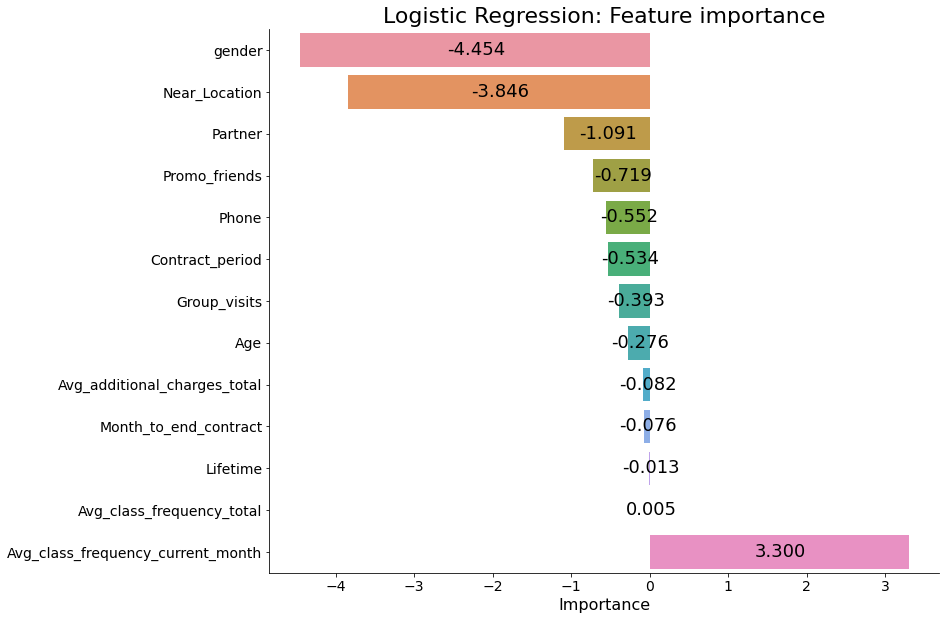

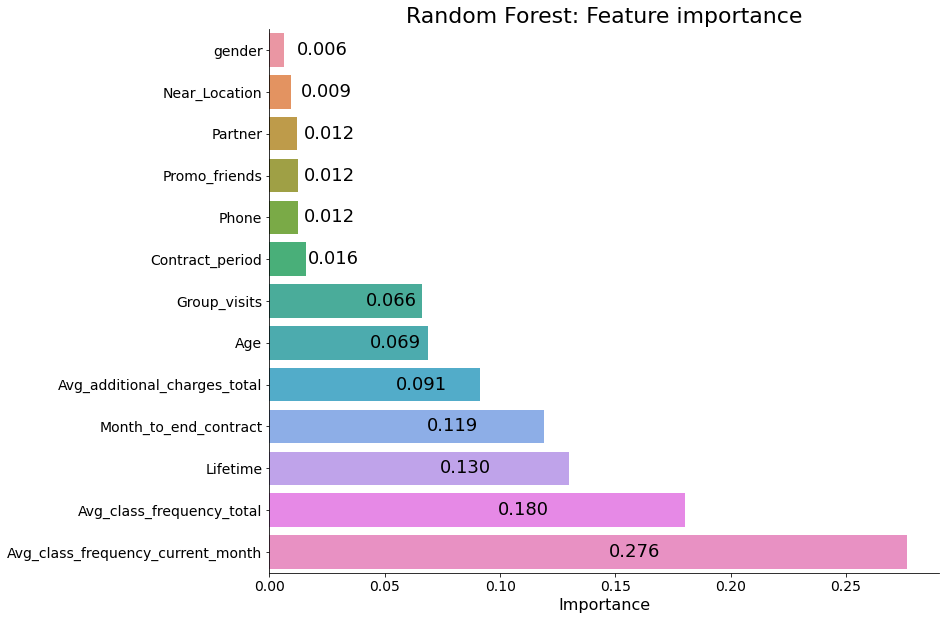

In [79]:
#Logistic regression
lrcoef = lr_model.coef_[0]
plt.figure(figsize = (12, 10))
impbar = sns.barplot(x = sorted(lrcoef), y = X.columns)
plt.title('Logistic Regression: Feature importance', fontsize = 22)
plt.xlabel('Importance', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=14)
sns.despine(right = True)
for bar in impbar.patches:
    plt.text((bar.get_width() * 0.5) + 0.02, bar.get_y() + (bar.get_height() / 2), '{:1.3f}'.format(bar.get_width()),
             ha='center', va='center', fontsize = 18)
plt.show()




#Random forest
rfimp = rf_model.feature_importances_
plt.figure(figsize = (12, 10))
impbar = sns.barplot(x = sorted(rfimp), y = X.columns)
plt.title('Random Forest: Feature importance', fontsize = 22)
plt.xlabel('Importance', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=14)
sns.despine(right = True)
for bar in impbar.patches:
    plt.text((bar.get_width() * 0.5) + 0.02, bar.get_y() + (bar.get_height() / 2), '{:1.3f}'.format(bar.get_width()),
             ha='center', va='center', fontsize = 18)
plt.show()

---

<a id="q2"></a>

- [Back to table of contents](#table) <a id="clustering"></a>
- [Back to Churn prediction](#buildmodel)

---

## Clustering users

### Creating matrix of distances and drawing a dendrogram:

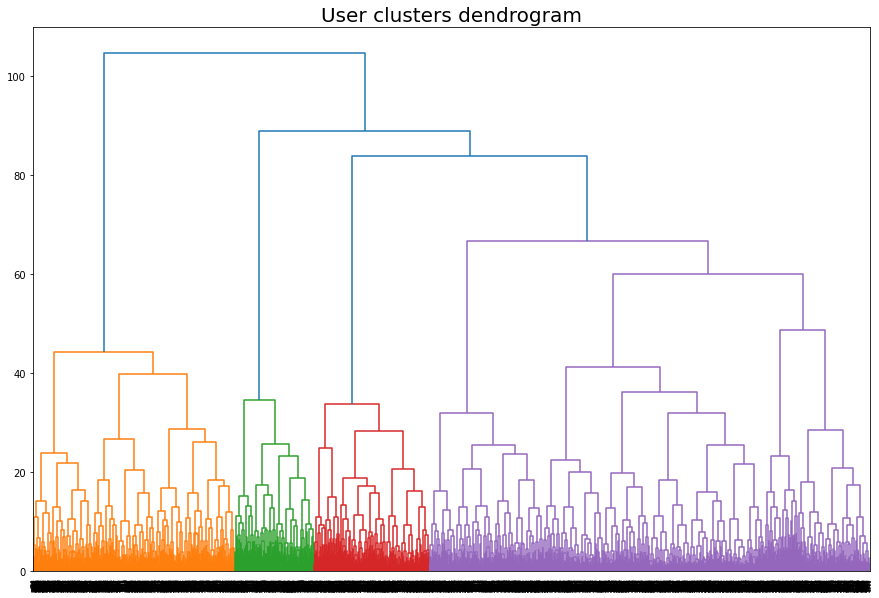

In [19]:
#Standarizing:
X_scaler = scaler.fit_transform(X)

#Creating distances matrix:
linked = linkage(X_scaler, method = 'ward')

#The Dendrogram takes a bit of time to load:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('User clusters dendrogram', fontsize = 20)
plt.show()

### According to the dendrogram the data is best to be split into 5 clusters.

- [Back to table of contents](#table) <a id="meanclusters"></a>
- [Back to Churn prediction](#buildmodel)

---

### Cluster feature mean values

In [20]:
#Setting K-means:
km = KMeans(n_clusters = 5, random_state = 0) # setting the number of clusters as 5.

#Creating clusters:
labels = km.fit_predict(X_scaler)

#Adding clusters to the gym df and checking the feature means by cluster:
gym['cluster'] = labels

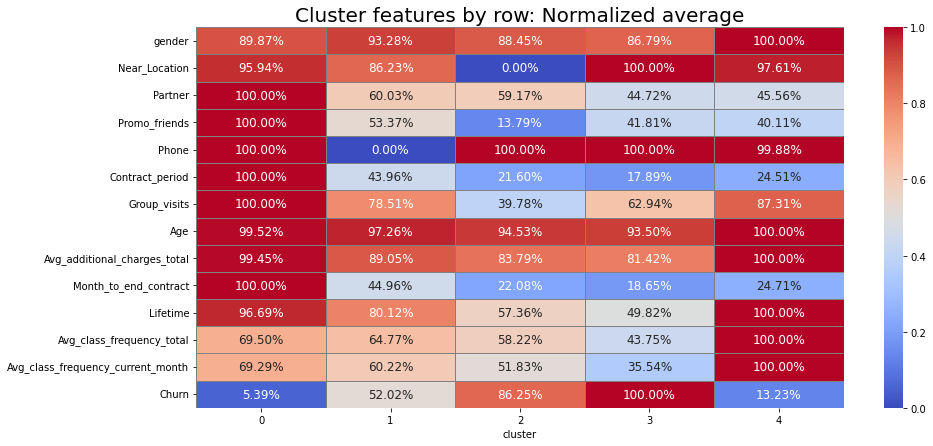

Cluster feature mean values:


cluster,0,1,2,3,4
gender,0.502970,0.522078,0.495050,0.485737,0.559666
Near_Location,0.959406,0.862338,0.000000,1.000000,0.976134
Partner,0.783168,0.470130,0.463366,0.350238,0.356802
Promo_friends,0.574257,0.306494,0.079208,0.240095,0.230310
Phone,1.000000,0.000000,1.000000,1.000000,0.998807
Contract_period,10.889109,4.787013,2.352475,1.948494,2.669451
Group_visits,0.542574,0.425974,0.215842,0.341521,0.473747
Age,29.982178,29.301299,28.477228,28.167987,30.125298
Avg_additional_charges_total,160.761016,143.957664,135.457501,131.622204,161.657905
Month_to_end_contract,9.954455,4.475325,2.198020,1.856577,2.459427


In [21]:
#normalizing feature mean values in order to plot a heatmap for convinient cluster comparison:
clusters_normalized = (gym.groupby('cluster').mean() / gym.groupby('cluster').mean().max()).T

#heatmap for normalized values:
plt.figure(figsize=(14.5, 7))
heat = sns.heatmap(clusters_normalized, annot = True, fmt = '.2%', linewidths= 1, linecolor='grey', cmap = ('coolwarm'), vmin = 0, cbar ='left', vmax = 1, annot_kws={'size':12}) 
plt.title('Cluster features by row: Normalized average', size = 20)
plt.show()
#printing the mean values as is:
print('Cluster feature mean values:')
gym.groupby('cluster').mean().T

- [Back to table of contents](#table) <a id="Clusterdist"></a>
- [Back to Churn prediction](#buildmodel)

---

### Cluster feature distribution

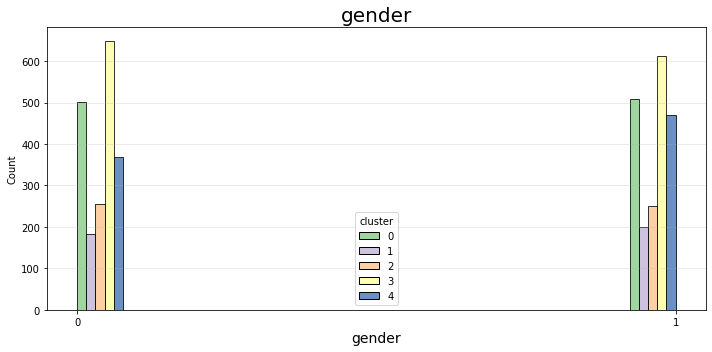

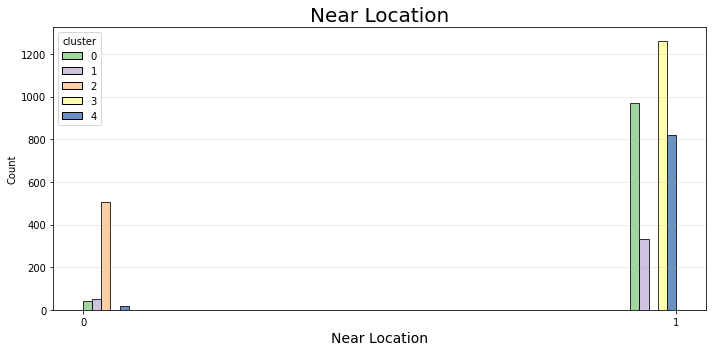

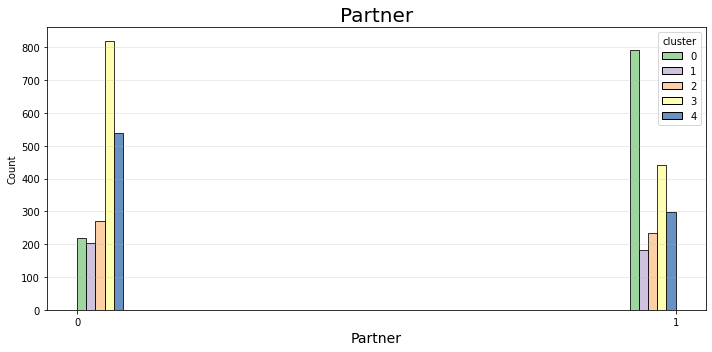

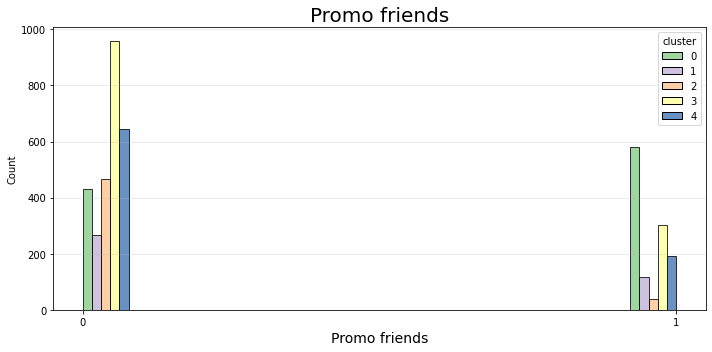

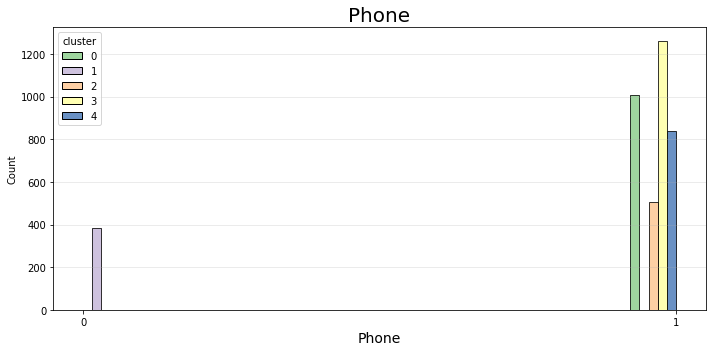

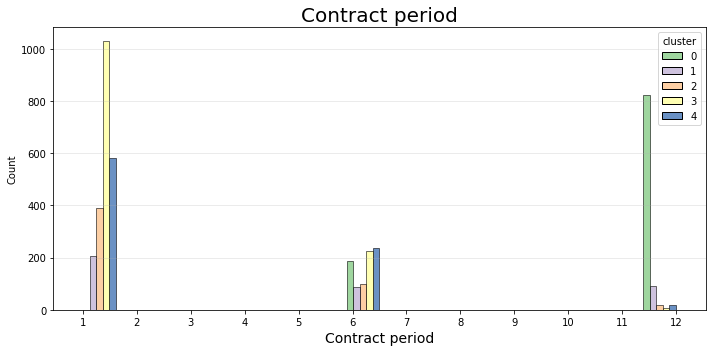

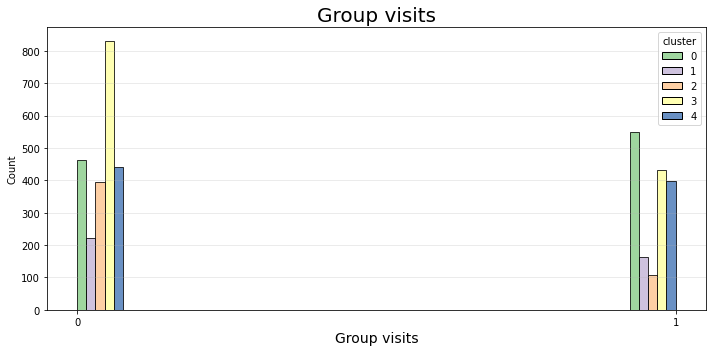

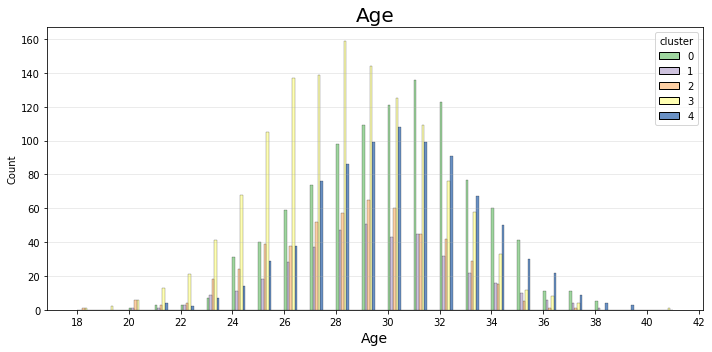

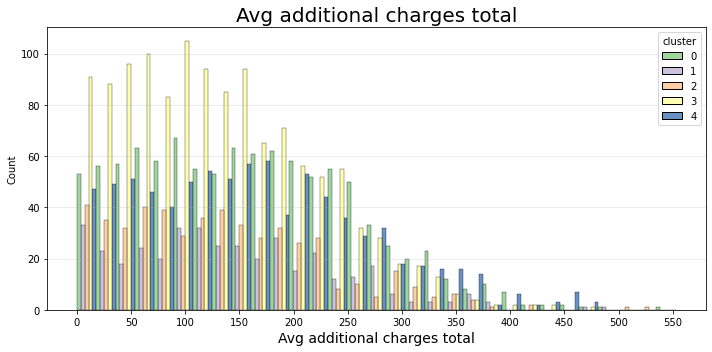

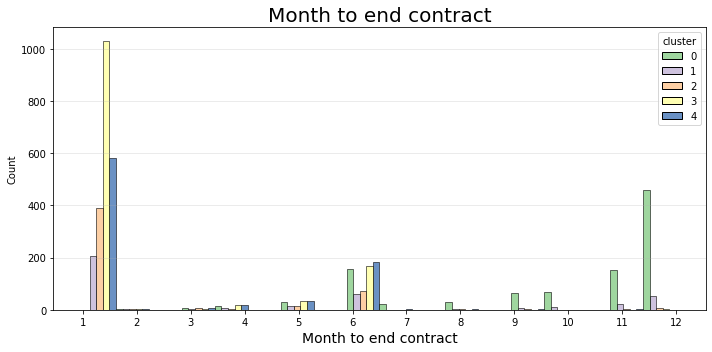

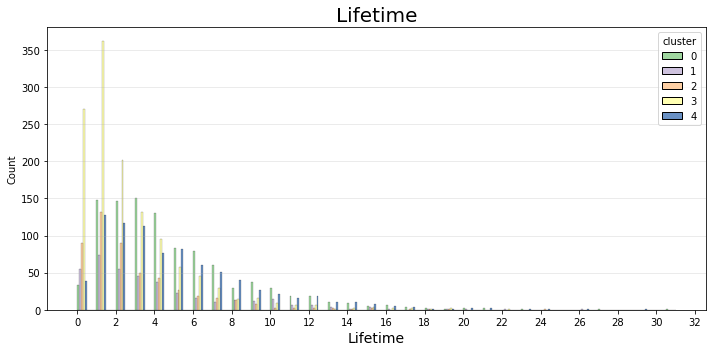

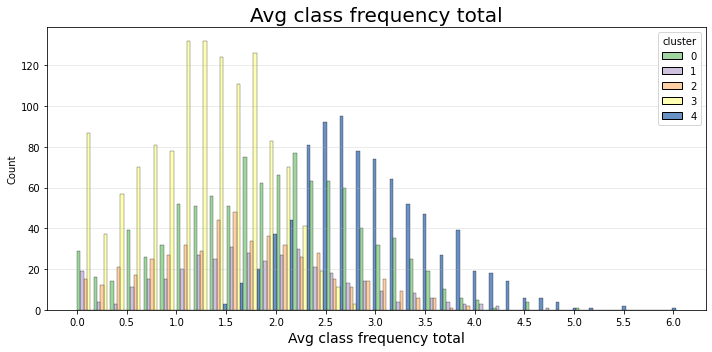

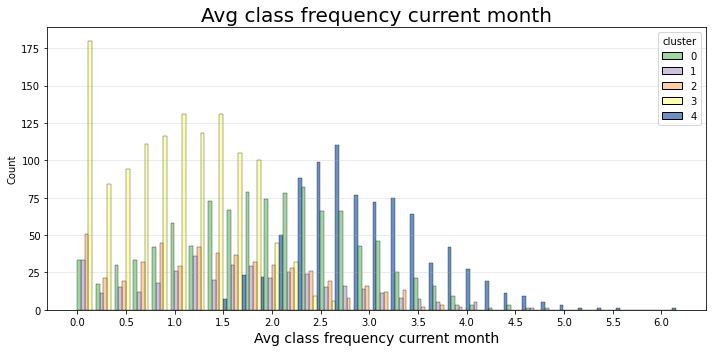

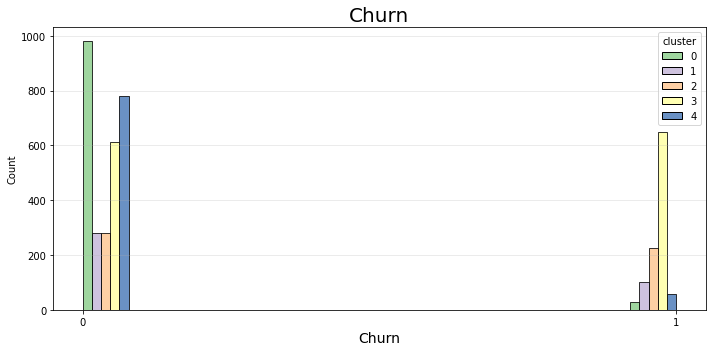

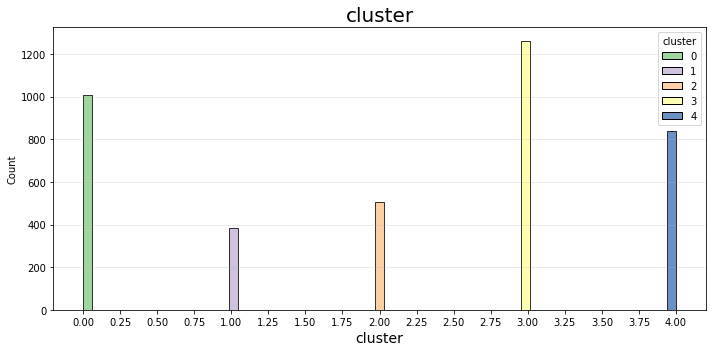

In [22]:
#plotting feature distribution by cluster:
for feat in gym.columns:
    values = gym[feat].nunique()
    plt.figure(figsize=(10, 5))
    sns.histplot(gym, x= feat, hue = 'cluster', multiple="dodge", palette = "Accent")
    plt.title(feat.replace('_', ' '), size=20)
    plt.grid(axis = 'y', alpha = 0.3)
    plt.xlabel(feat.replace('_', ' '), size=14)
    plt.locator_params(axis='x', nbins= (gym[feat].nunique() if gym[feat].nunique() <= 2 else 20))
    plt.tight_layout()
    plt.show()

- [Back to table of contents](#table) <a id="clusterchurn"></a>
- [Back to Churn prediction](#buildmodel)

---

### Clusters churn rate

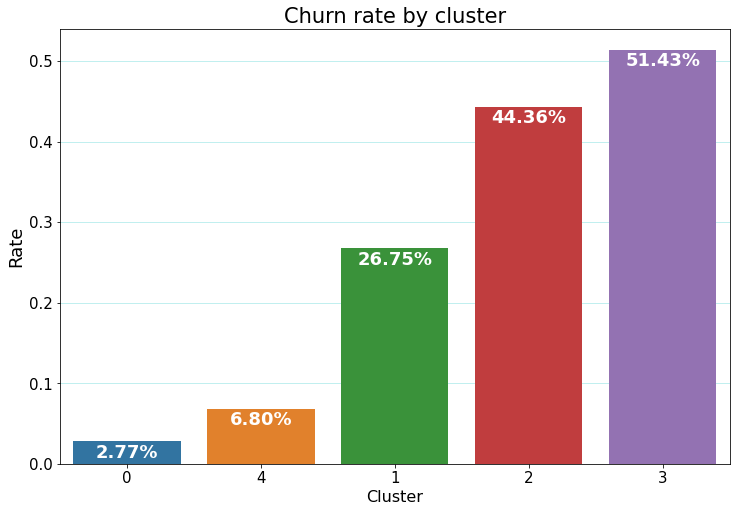

In [23]:
#creating the churn rate table:
cluster_churn = gym.groupby('cluster')['Churn'].mean().sort_values().reset_index()

#drawing a barplot:
plt.figure(figsize = (12,8))
churntplot = sns.barplot(data = cluster_churn, x = 'cluster', y = 'Churn', order = cluster_churn['cluster'], zorder = 3)
plt.title('Churn rate by cluster', size = 21)
plt.ylabel(ylabel ='Rate', size = 18)
plt.xlabel('Cluster', size = 16)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.grid(color = 'c', alpha = 0.3, axis = 'y')
for bar in churntplot.patches:
    plt.annotate(format(bar.get_height(), ('.2%')), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='bottom', size=18, xytext=(0, -20), textcoords='offset points', c = 'w', weight = 'bold')
plt.show()

#cluster_churn

- [Back to table of contents](#table) <a id="clusterconc"></a>
- [Back to Churn prediction](#buildmodel)

---

### Cluster conclusions:
#### Cluster 0:
- Churn rate is the lowest of all other clusters of 2.7%.
- The following feature average values are the highest of all clusters:
    - Partner: Most of the costumers are subscribed through a partner company contract.
    - Contract_period: Most costumers have signed on a 12 months long contract (the longest available).
    - Group_visits: More than half of the costumers take part in group sessions. 
    - Month_to_end_conract: Most costumers 8 to 12 months left in their subscription.
- The following feature average values are very high compared to the other clusters (although not the highest):
    - Near_Location: Almost all costumers in this cluster live nearby the gym.
    - Avg_additional_charges_total: Most costumers have spend a large sum of money on additional services.
    - Lifetime: Most costumers have been subscribed for about 4 months. Lifetime varies from 0 to 29, most costumers have 3 months in their lifetie feature.
    - Avg_class_frequency_total, and Avg_class_frequency_Current_month: Many of the costumers attended about 2 classes a week through their subscription, including the last month of when the data was taken.
 
 
All these high values may explain the low churn rate for cluster 0.
#### Cluster 4:
- This cluster has 6%  Churn rate, and is almost as low as cluster 0.
- In most features it's similar to cluster 0, with some changes:
    - It is lower than cluster 0 in the following features:<br>
        Contract_period, Month_to_end_conract, Promo_friends and Partner.
    - It is higher than cluster 0 in the following features:<br>
    - Avg_class_frequency_total, and Avg_class_frequency_current_month.<br>
    
Both feature difference groups seem to contribute to the slightly higher Churn rate,
    
#### Cluster 1, and 2:
- These clusters vary a little between the features, but in most of the features they seem to have normal mean values.
- Churn rate:
    - Cluster 1 has 26% Churn rate.
    - Cluster 2 has 44% Churn rate.
    
Cluster 2 is ineed lower in feature values as expected after seeing it's high churn rate.

#### Cluster 3:
- This cluster has a 51% churn rate and is the highest in churn rate of all other clusters.
- In most of it's features the average is very low.

It's interesting to see that despite it's high churn rate, all of the costumers in this cluster live nearby. maybe this feature is not very important, or maybe it's actually helps contain the churn rate from being even higher?  hmm...

#### Overall clusters 0 and 4 are best

- [Back to table of contents](#table) <a id="general_electric"></a>
- [Back to Churn prediction](#buildmodel)

---

# General conclusions and recommendations:
## EDA:
- Most of the users did not churn!
- The data was ready to be analysed, no fixes or preprocessing were needed, with a minor exception of turning one of the features from float to int data type.
- Most costumers have a month left in their contract, many of them also signed up for a monnth long plan.

## Features:

- These features seem to have a significant effect on whether users will churn:
    - **Partner:** It seems that it's a good idea to partner with companies, as the subscribers tend to churn less often. perhaps this is due to the discount they get. in this case special discount should be considered for other subscribers as well.
    - **Promo_friends**: Subscribers who are under the "bring a friend" program also tend to churn less often. This is probably because: **A.** Discount. **B.** A friend serves as a motivator to keep exercising.
    - **Group_visits**, **Avg_class_frequency_total**, and **Avg_class_frequency_current_month**: Subscribers who participate in group sessions and classes are less likely to churn, similarly to the promo friend feature, socializing and having company in the gym must be motivating to stay.
    - **Avg_additional_charges_total**: Big spenders who used additional services are likely to stay. Maybe if the service is one that is being used slowly over time (such as a 10 time pool entry, 30 protein shakes, etc.), then no one who purchased it will churn as long as it's active. Another reason could be great services!.
    - **Age**: Customers who are around 27 year old churned the most. The older the age the less the churn rate. Probably because in later life people are more stabilized and serious in their choices, and of course more financially established.
    
- **Contact period** and **Lifetime** are especially important, those who have long contracts (6 months and above), and those who already have gone through a few months of subscription are more likely to stay. It makes great sense, to wait until subscription ends, in order to end it.


- These features seem to have little or no effect on whether users will churn:<br>
    **Gender, Near_Location**, and **Phone**.
    
## Observations:
- Customers are less likely to churn if they:
    - Are a part of a partner program.
    - Signed up with the "bring a friend program".
    - Take part in group sessions.
    - Spent money on additional services.
    - Take classes frequently.
    - Have contract for longer than 2 months.
    - Are already customers for a couple of months (2 is good, 7 and up is great)
    - Older.
    
# Recommendations:
- As many costumers churn when their subscription ends, it is a good strategy to try and renew their subscription as early as possible, and before their subscription has less than two months left:
    - It is a good idea to consider to cancel the month-long plan.
    - Maybe offer a special discount or a free month to long subscribers. We know customers love discounts be looking at the churn rate of the promo friends and the partner features (those who use these subcscriptions churn less).
- Keep additional services doing what they do, it seems to have a good effect on churn.
- Try marketing the gym to age 30 and above a little more.
- Phone might not affect the churn rate, but it is very important to have a way to reach your costumers!. Consider making it mandatory to leave a phone number, or at least make a great effort in getting contact info.
    
- Join the gym, it's good for you!

- [Back to table of contents](#table) <a id="general_electric"></a>
- [Back to EDA](#alookat)
- [Back to Churn prediction](#buildmodel)